In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-78.78210897369298 99.77682755571999
-87.99211578104655 173.33736600512066
86.91596307435393 -8.902787029010597
52.5270445978293 -39.04712260492599
89.0819566779596 161.03470738542183
-60.51054639177054 -47.3404703966296
17.044683980731662 -161.43575041253598
57.234193531252004 146.87146592204272
71.15086477630405 -31.156092130580703
-21.185079585610524 178.8070482303673
-87.10099297090889 11.660339245788578
53.30241270184044 -28.065368445148863
-15.17648690521213 140.05187519078225
-74.44784779140798 -152.95833865449922
-75.35158069343098 125.49871024933014
26.500573265342965 -143.5896049715605
5.497922895766493 79.92141572339705
-41.837962215880275 132.52278128175203
7.217291848535254 146.76920900637555
-22.496355225402482 -45.387612918159675
76.61520353186575 -138.06163511716818
-2.2324540272674795 39.110355601886084
5.028824618724997 170.0600727331465
78.4083695683903 -160.69138531324472
50.3888815117208 -96.66692021847544
10.48782879837674 -16.69518139535515
69.40264937265835 -125

29.017541509101605 -101.51804897939158
81.04704529413769 90.12864603788756
71.37685727084249 111.13167257008507
31.38995133557576 85.18696590727632
-48.25176447845399 76.43559170428944
13.868115897907515 -52.987939159954095
73.66408773893252 35.81336276200793
21.37156178098155 -101.17691537047914
30.876390694889878 -133.5360746666624
59.84129442323311 -166.20172744652334
-68.66264355948556 -49.62758266245655
-34.161117754002426 -136.82605762746454
9.611983130585017 -69.14029767458166
-51.09120959078646 -27.027234833955674
-40.58220344046129 -2.067218926618665
-61.30985342928875 151.98879580839514
66.05195767146338 178.4643855156404
36.66174537706769 -143.01694348644008
60.84089373932596 -43.31902045484239
-36.293145758167725 -92.88504193750191
48.64890111535942 114.61673113070361
-16.483890465806624 -12.507260889347918
-52.56031826895012 -118.47204215126344
-42.08850722458758 163.6969972982801
-57.90270529722264 -34.93136331563895
-47.76981410841746 -62.95434245409372
49.21193256931531

-1.2798851858152744 97.82657723195928
82.99764430395743 -112.61538781312305
-54.53104354934728 -19.373231895242213
-71.13672593101668 55.47182467120848
-74.81263550690473 -84.93873396932489
39.82822147631231 163.56653956361902
-70.72874403751193 19.565473245780026
24.05143409205037 69.87924333118036
19.918521466828153 -47.427318402165355
-53.307380762908664 2.3312748300072315
-46.74080673024112 -26.055219926985444
-34.590380781216645 -143.33533479610244
-37.920871416900596 66.77455828105701
79.66741533373451 92.19338507963874
-3.0194109835730814 -41.00687667616148
-26.036062159025512 -164.92257629026744
25.951873909860737 90.82281878624991
-28.709809025969783 106.38322088898792
73.62310314344396 161.40391389696492
-7.205742484671418 116.19011869104281
-78.35788426296159 104.04157430584803
-48.1126795876705 88.25577666807868
72.21708043350532 155.65652618056816
-71.55606696658258 -43.85275890435156
58.14189279491768 91.09630611913946
75.12138022978431 -133.95192647150412
-49.74213886298

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


630

In [7]:
#6.2.6
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call. build basic URL for website and add API key to URL.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # try-except block 6.2.6
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | nanortalik
Processing Record 5 of Set 1 | cherskiy
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | nanakuli
Processing Record 8 of Set 1 | arman
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | isangel
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | grindavik
Processing Record 13 of Set 1 | alyangula
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | galle
Processing Record 18 of Set 1 | port lincoln
Processing Record 19 of Set 1 | lorengau
Processing Record 20 of Set 1 | itajuba
Processing Record 21 of Set 1 | tuktoyaktuk
Processing Record 22 of Set 1 | voi
Processing Record 23 of Set 1 | butaritari
Processing Record 24 of Set 1 | barrow

Processing Record 43 of Set 4 | tiksi
Processing Record 44 of Set 4 | tilichiki
Processing Record 45 of Set 4 | shypyntsi
Processing Record 46 of Set 4 | newport
Processing Record 47 of Set 4 | varhaug
Processing Record 48 of Set 4 | burica
City not found. Skipping...
Processing Record 49 of Set 4 | victoria
Processing Record 50 of Set 4 | turukhansk
Processing Record 1 of Set 5 | zalantun
Processing Record 2 of Set 5 | ratnagiri
Processing Record 3 of Set 5 | roblin
Processing Record 4 of Set 5 | high level
Processing Record 5 of Set 5 | ewa beach
Processing Record 6 of Set 5 | charters towers
Processing Record 7 of Set 5 | imeni babushkina
Processing Record 8 of Set 5 | bengkulu
Processing Record 9 of Set 5 | vanimo
Processing Record 10 of Set 5 | saint anthony
Processing Record 11 of Set 5 | bandarbeyla
Processing Record 12 of Set 5 | matagami
Processing Record 13 of Set 5 | miyako
Processing Record 14 of Set 5 | the valley
Processing Record 15 of Set 5 | foix
Processing Record 16 o

Processing Record 36 of Set 8 | dien bien
City not found. Skipping...
Processing Record 37 of Set 8 | minuri
Processing Record 38 of Set 8 | ambilobe
Processing Record 39 of Set 8 | berlevag
Processing Record 40 of Set 8 | grand gaube
Processing Record 41 of Set 8 | dunedin
Processing Record 42 of Set 8 | argudan
Processing Record 43 of Set 8 | nakhon phanom
Processing Record 44 of Set 8 | contamana
Processing Record 45 of Set 8 | rudbar
Processing Record 46 of Set 8 | honningsvag
Processing Record 47 of Set 8 | kuryk
Processing Record 48 of Set 8 | dingle
Processing Record 49 of Set 8 | balimo
City not found. Skipping...
Processing Record 50 of Set 8 | kupang
Processing Record 1 of Set 9 | rio grande
Processing Record 2 of Set 9 | novo aripuana
Processing Record 3 of Set 9 | soyaniquilpan
Processing Record 4 of Set 9 | gizo
Processing Record 5 of Set 9 | odweyne
Processing Record 6 of Set 9 | jinchang
Processing Record 7 of Set 9 | fairbanks
Processing Record 8 of Set 9 | souillac
Pro

Processing Record 21 of Set 12 | idar
Processing Record 22 of Set 12 | bembereke
Processing Record 23 of Set 12 | elliot lake
Processing Record 24 of Set 12 | mbanza-ngungu
Processing Record 25 of Set 12 | sola
Processing Record 26 of Set 12 | partizanskoye
Processing Record 27 of Set 12 | ocos
Processing Record 28 of Set 12 | wajid
Processing Record 29 of Set 12 | miri
Processing Record 30 of Set 12 | samarai
Processing Record 31 of Set 12 | luba
Processing Record 32 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 33 of Set 12 | san cristobal
Processing Record 34 of Set 12 | ouallam
Processing Record 35 of Set 12 | fort nelson
Processing Record 36 of Set 12 | bonavista
Processing Record 37 of Set 12 | kijang
Processing Record 38 of Set 12 | aviles
Processing Record 39 of Set 12 | kaitangata
Processing Record 40 of Set 12 | nhulunbuy
Processing Record 41 of Set 12 | sembe
Processing Record 42 of Set 12 | emba
Processing Record 43 of Set 12 | saint-georges
Processing

In [12]:
len(city_data)

586

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame. 6.2.7
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,74.03,61,23,6.49,US,2022-08-31 22:59:17
1,Bluff,-46.6000,168.3333,57.79,83,94,4.63,NZ,2022-08-31 23:01:20
2,Nanortalik,60.1432,-45.2371,41.07,78,72,9.89,GL,2022-08-31 23:01:21
3,Cherskiy,68.7500,161.3000,40.39,75,100,4.81,RU,2022-08-31 23:01:21
4,Ushuaia,-54.8000,-68.3000,46.06,66,40,5.75,AR,2022-08-31 22:57:28
5,Nanakuli,21.3906,-158.1547,86.99,64,42,8.16,US,2022-08-31 23:01:22
6,Arman,59.7000,150.1667,57.02,71,9,5.03,RU,2022-08-31 23:01:23
7,Tasiilaq,65.6145,-37.6368,37.56,96,91,8.30,GL,2022-08-31 23:01:23
8,Isangel,-19.5500,169.2667,75.76,61,96,15.48,VU,2022-08-31 23:01:24
9,Hermanus,-34.4187,19.2345,59.11,47,46,11.43,ZA,2022-08-31 23:01:25


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-08-31 22:59:17,42.6001,-73.9662,74.03,61,23,6.49
1,Bluff,NZ,2022-08-31 23:01:20,-46.6000,168.3333,57.79,83,94,4.63
2,Nanortalik,GL,2022-08-31 23:01:21,60.1432,-45.2371,41.07,78,72,9.89
3,Cherskiy,RU,2022-08-31 23:01:21,68.7500,161.3000,40.39,75,100,4.81
4,Ushuaia,AR,2022-08-31 22:57:28,-54.8000,-68.3000,46.06,66,40,5.75
5,Nanakuli,US,2022-08-31 23:01:22,21.3906,-158.1547,86.99,64,42,8.16
6,Arman,RU,2022-08-31 23:01:23,59.7000,150.1667,57.02,71,9,5.03
7,Tasiilaq,GL,2022-08-31 23:01:23,65.6145,-37.6368,37.56,96,91,8.30
8,Isangel,VU,2022-08-31 23:01:24,-19.5500,169.2667,75.76,61,96,15.48
9,Hermanus,ZA,2022-08-31 23:01:25,-34.4187,19.2345,59.11,47,46,11.43


In [44]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label= "City_ID")

#how to get City_ID to be read in the DF and not just added to the CSV. need to set next cell to True as well.
city_data_df.index = city_data_df.index.rename('City_ID')

In [45]:
#reset the index so it can show the City_ID
city_data_df.reset_index(inplace = True)

In [17]:
# Extract relevant fields from the DataFrame for plotting.
#make scatter plots 6.3.1
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

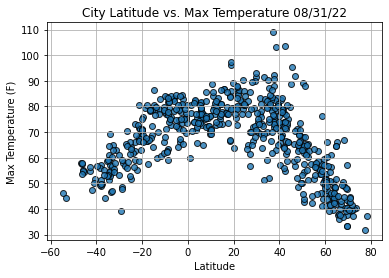

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

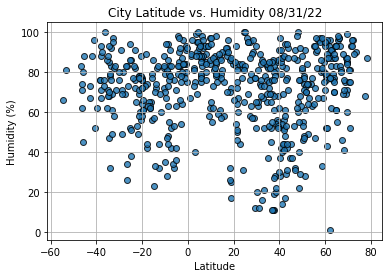

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


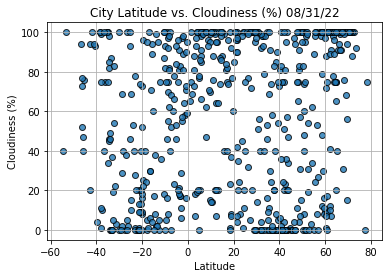

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

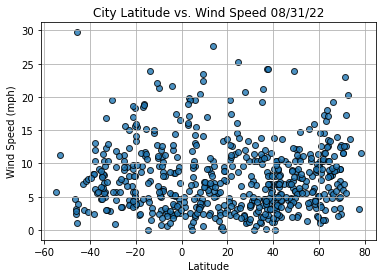

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [46]:
#use Loc method to make a DF from the DF. 
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                  New Norfolk
Country                        AU
Date          2022-08-31 23:01:27
Lat                      -42.7826
Lng                      147.0587
Max Temp                     54.9
Humidity                       67
Cloudiness                     94
Wind Speed                    3.0
Name: 13, dtype: object

In [47]:
#filter DF based on value of a row. get all N Hemi lat >= 0 
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4      False
       ...  
581    False
582     True
583    False
584     True
585     True
Name: Lat, Length: 586, dtype: bool

In [48]:
#return a DF with all the data fitting the criteria, for lat >= 0 using LOC method. adding conditional filter. 
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Albany,US,2022-08-31 22:59:17,42.6001,-73.9662,74.03,61,23,6.49
2,2,Nanortalik,GL,2022-08-31 23:01:21,60.1432,-45.2371,41.07,78,72,9.89
3,3,Cherskiy,RU,2022-08-31 23:01:21,68.7500,161.3000,40.39,75,100,4.81
5,5,Nanakuli,US,2022-08-31 23:01:22,21.3906,-158.1547,86.99,64,42,8.16
6,6,Arman,RU,2022-08-31 23:01:23,59.7000,150.1667,57.02,71,9,5.03


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

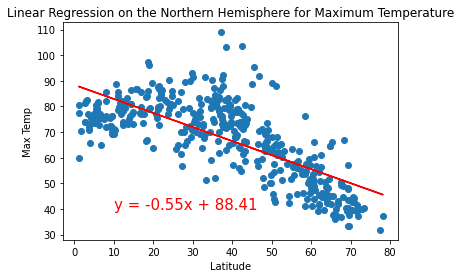

In [28]:
# Linear regression on the Northern Hemisphere (max temp)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

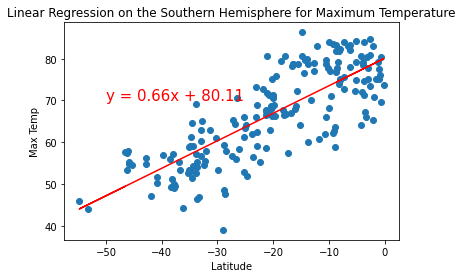

In [52]:
# Linear regression on the Southern Hemisphere (max temp)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,70))

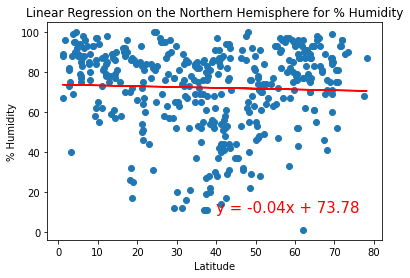

In [30]:
# Linear regression on the Northern Hemisphere (% humidity)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

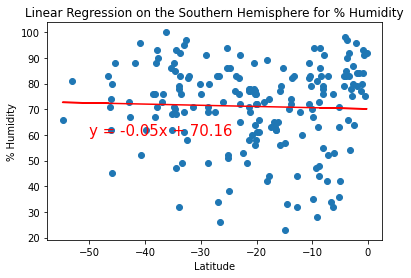

In [51]:
# Linear regression on the Southern Hemisphere (% humidity)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,60))

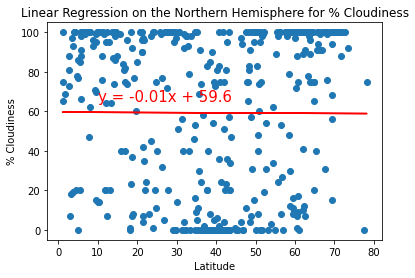

In [32]:
# Linear regression on the Northern Hemisphere (% cloudiness)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,65))

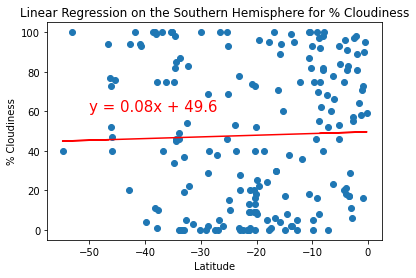

In [33]:
# Linear regression on the Southern Hemisphere (% cloudiness)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

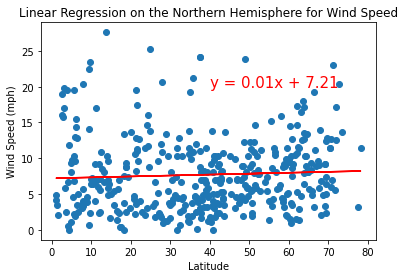

In [34]:
# Linear regression on the Northern Hemisphere (wind speed)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed (mph)',(40,20))

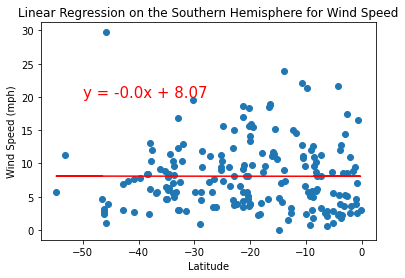

In [49]:
# Linear regression on the Southern Hemisphere (wind speed)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed (mph)',(-50,20))